In [8]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [9]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [10]:
!ls

german-traffic-signs  sample_data


In [0]:
# Loading the dataset and importing the necessary libraries.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [0]:
with open("german-traffic-signs/train.p",'rb') as f:
  train = pickle.load(f)

In [0]:
with open("german-traffic-signs/valid.p",'rb') as f:
  val = pickle.load(f)

In [0]:
with open("german-traffic-signs/test.p",'rb') as f:
  test = pickle.load(f)

In [15]:
print(type(train))

<class 'dict'>


In [0]:
X_train, y_train = train['features'], train['labels']

In [0]:
X_val, y_val = val['features'], val['labels']

In [0]:
X_test, y_test = test['features'], test['labels']

In [19]:
X_train.shape

(34799, 32, 32, 3)

In [20]:
X_val.shape

(4410, 32, 32, 3)

In [21]:
X_test

array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116, 136, 168],
         [118, 139, 172]],

        [[116, 136, 166],
         [114, 134, 168],
         [113, 131, 166],
         ...,
         [113, 135, 167],
         [117, 136, 165],
         [115, 139, 167]],

        [[112, 135, 167],
         [110, 134, 165],
         [119, 135, 165],
         ...,
         [115, 138, 167],
        

In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images to labels are not equal"
assert(X_train.shape[1:]==(32,32,3)),"The dimensions are not equal to 32*32*3"

So the X_train data is asserted that there is no discrepency in dimension and X and Y shape.

In [0]:
# Loading the csv file using pandas
data  = pd.read_csv("german-traffic-signs/signnames.csv")

In [24]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


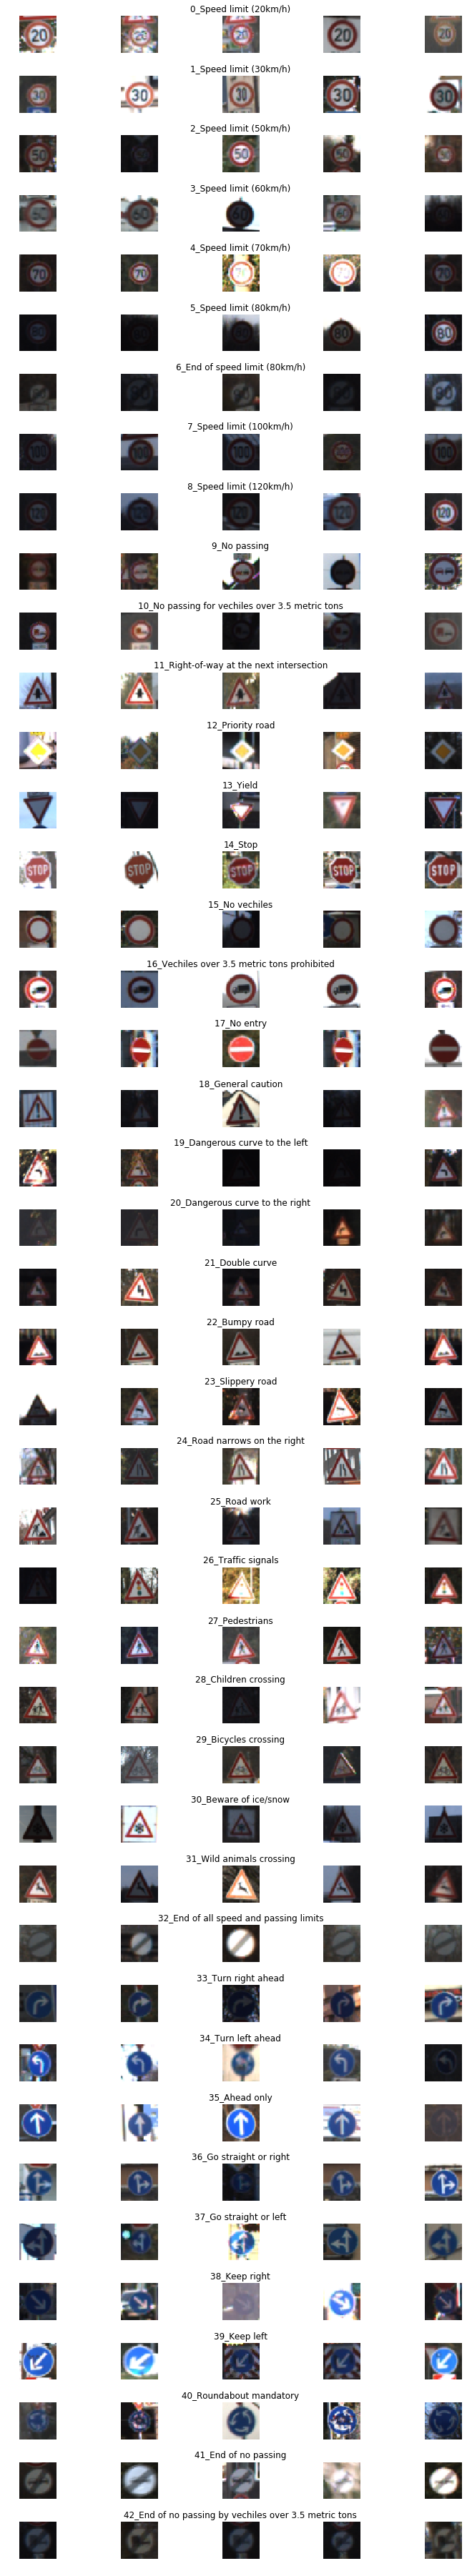

In [25]:
 # visualizing the images.
  num_of_samples =[]
  cols = 5
  num_classes = 43
  fig, axs = plt.subplots(nrows = num_classes,ncols = cols, figsize= (10,50))
  fig.tight_layout()
  for i in range(cols):
    for j,row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :],cmap = plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i==2:
        axs[j][i].set_title(str(j)+ "_"+ row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


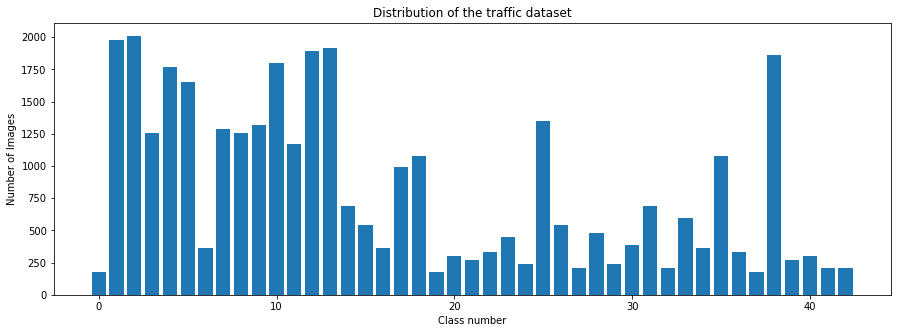

In [26]:
# Plotting distribution of the train dataset.
print(num_of_samples)
plt.figure(figsize= (15,5))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the traffic dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")
plt.show()

(32, 32, 3)
imgae-number 36


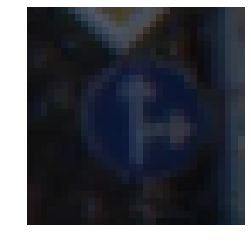

In [27]:
# analysing one image
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print("imgae-number", y_train[1000])

(32, 32)


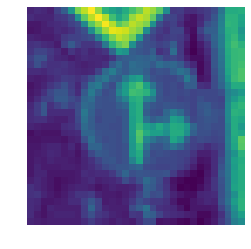

In [28]:
#converting the rgb to gray.
def grayscale(img):
  img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)  # we have 2D shape not having the depth.

In [0]:
 # equlaizing the image fro more contrast. Only for gray scale images.
  def equalize(img):
    img =cv2.equalizeHist(img)
    return img

In [0]:
# organising all preprocessing.
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255  # normalization
  return img

In [0]:
# updating each item of the data
X_train = np.array(list(map(preprocessing,X_train)))

In [0]:
X_test  = np.array(list(map(preprocessing,X_test)))

In [0]:
X_val = np.array(list(map(preprocessing,X_val)))

(-0.5, 31.5, 31.5, -0.5)

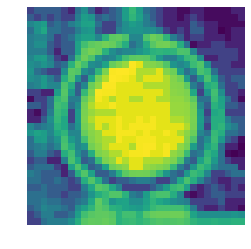

In [34]:
# visualizing a random preprocessed sample.
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")


In [0]:
# one hot encode data labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
# modeifying the images using ImageDataGenerator for improving our model.
datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)
datagen.fit(X_train )

In [0]:
batch_size = datagen.flow(X_train, y_train, batch_size =20 )

In [0]:
# reshaping the data
X_train = X_train.reshape(34799, 32 ,32 ,1)
X_val = X_val.reshape(4410, 32 ,32 ,1)
X_test = X_test.reshape(12630, 32 ,32 ,1)

In [0]:
# using LeNet model.without data augmentation.
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape = (32,32,1),activation='relu' )) # not overloading the model with borders as it does not contribute in the feature.
  model.add(MaxPooling2D(pool_size=(2,2))) # scale the images 1/2 of its original size.
  model.add(Conv2D(15,(3,3),activation='relu')) # output will be 12 x 12
  model.add(MaxPooling2D(pool_size=(2,2))) 
  model.add(Flatten())  # reshaping in 1D for using the fully connected layer.
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes,activation='softmax'))
  
  # compiling the model
  model.compile(Adam(lr = 0.01),loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

In [41]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [42]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_val, y_val), batch_size = 50, shuffle = 1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.5003 - acc: 0.0554 - val_loss: 3.5546 - val_acc: 0.0544
Epoch 2/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4854 - acc: 0.0562 - val_loss: 3.5575 - val_acc: 0.0476
Epoch 3/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4830 - acc: 0.0544 - val_loss: 3.5719 - val_acc: 0.0544
Epoch 4/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4809 - acc: 0.0537 - val_loss: 3.5581 - val_acc: 0.0544
Epoch 5/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4799 - acc: 0.0566 - val_loss: 3.5579 - val_acc: 0.0544
Epoch 6/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4794 - acc: 0.0562 - val_loss: 3.5579 - val_acc: 0.0476
Epoch 7/10
34799/34799 [==============================] - 48s 1ms/step - loss: 3.4790 - acc: 0.0554 - val_loss: 3.5571 - val_acc:

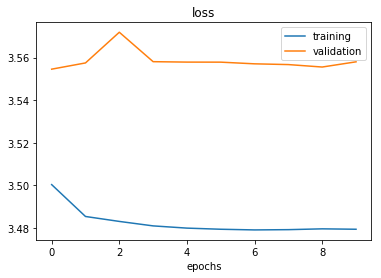

In [43]:
# plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training", "validation"])
plt.title("loss")
plt.xlabel("epochs")
plt.show()

We can see that our leNet model is overfitting. 

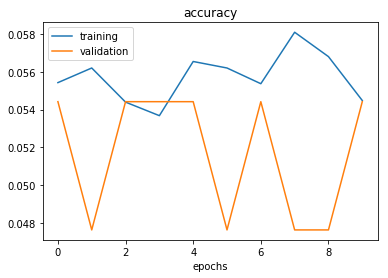

In [44]:
# plotting accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["training", "validation"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.show()

The model needs Hyperparameter optimization for increasing performanence.

# Improving model with data augmentation and modifications in the model.


In [0]:
def model():
   
  model = Sequential()
  model.add(Conv2D(60,(5,5), input_shape = (32,32,1),activation='relu' ))
  model.add(Conv2D(60,(5,5),activation='relu' ))
    
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30,(3,3),activation='relu')) 
  model.add(Conv2D(30,(3,3),activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2,2))) 
  model.add(Flatten())  
  
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  
  # compiling the model
  model.compile(Adam(lr = 0.001),loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

In [48]:
model = model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)               0         
__________

In [49]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size= 50),steps_per_epoch=1000, epochs = 10, validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
1000/1000 [==============================] - 613s 613ms/step - loss: 1.4200 - acc: 0.5932 - val_loss: 0.2455 - val_acc: 0.9170
Epoch 2/10
1000/1000 [==============================] - 615s 615ms/step - loss: 0.4304 - acc: 0.8660 - val_loss: 0.1224 - val_acc: 0.9601
Epoch 3/10
1000/1000 [==============================] - 614s 614ms/step - loss: 0.2756 - acc: 0.9145 - val_loss: 0.0586 - val_acc: 0.9803
Epoch 4/10
1000/1000 [==============================] - 614s 614ms/step - loss: 0.2134 - acc: 0.9342 - val_loss: 0.0840 - val_acc: 0.9762
Epoch 5/10
1000/1000 [==============================] - 614s 614ms/step - loss: 0.1801 - acc: 0.9442 - val_loss: 0.0600 - val_acc: 0.9837
Epoch 6/10
1000/1000 [==============================] - 614s 614ms/step - loss: 0.1548 - acc: 0.9514 - val_loss: 0.0415 - val_acc: 0.9878
Epoch 7/10
1000/1000 [==============================] - 614s 614ms/step - loss: 0.1311 - acc: 0.9592 - val_loss: 0.0343 - val_acc: 0.9898
Epoch 8/10
1000/1000 [============

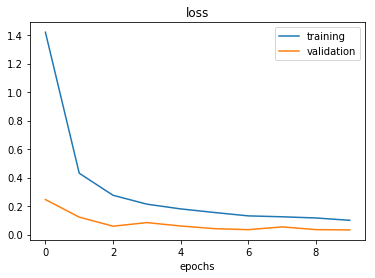

In [50]:
 # plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training", "validation"])
plt.title("loss")
plt.xlabel("epochs")
plt.show()

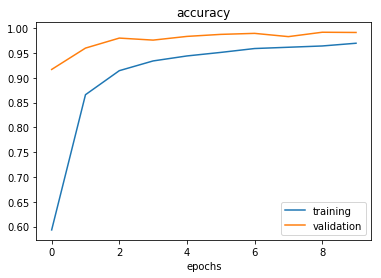

In [51]:
# plotting accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["training", "validation"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.show()

In [52]:
score = model.evaluate(X_test, y_test,verbose = 0)
print("Test score", score[0])
print("Test Accuracy", score[1])

Test score 0.1367896622098722
Test Accuracy 0.9694378464163436


The accuray has increased significantly using modified model with hyperparameter optimization and more data generation using image augmentation.